Import relevant libraries, import csv file as a DataFrame, and print the head of the resultant Dataframe (df)

In [1]:
#Import pandas, matplotlib.pyplot, numpy, and seaborn 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [2]:
#import csv file into a pandas DataFrame as 'raw_data'
raw_data = pd.read_csv('Training.csv', sep=',')

Find Shape and descriptive characteristics of df

In [3]:
raw_data.info()
list(raw_data.columns.values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


['itching',
 'skin_rash',
 'nodal_skin_eruptions',
 'continuous_sneezing',
 'shivering',
 'chills',
 'joint_pain',
 'stomach_pain',
 'acidity',
 'ulcers_on_tongue',
 'muscle_wasting',
 'vomiting',
 'burning_micturition',
 'spotting_ urination',
 'fatigue',
 'weight_gain',
 'anxiety',
 'cold_hands_and_feets',
 'mood_swings',
 'weight_loss',
 'restlessness',
 'lethargy',
 'patches_in_throat',
 'irregular_sugar_level',
 'cough',
 'high_fever',
 'sunken_eyes',
 'breathlessness',
 'sweating',
 'dehydration',
 'indigestion',
 'headache',
 'yellowish_skin',
 'dark_urine',
 'nausea',
 'loss_of_appetite',
 'pain_behind_the_eyes',
 'back_pain',
 'constipation',
 'abdominal_pain',
 'diarrhoea',
 'mild_fever',
 'yellow_urine',
 'yellowing_of_eyes',
 'acute_liver_failure',
 'fluid_overload',
 'swelling_of_stomach',
 'swelled_lymph_nodes',
 'malaise',
 'blurred_and_distorted_vision',
 'phlegm',
 'throat_irritation',
 'redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'congestion',
 'chest_pain',


In [4]:
raw_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [5]:
print(raw_data['prognosis'].value_counts())
print('Number of diagnoses: ' + str(len(raw_data['prognosis'].unique())))

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

Hmm, there are exactly 120 values for each of the 41 disease diagnoses included in the data set. This indicates that this data has likely been cherry-picked and sanitized for the sake of the Kaggle excercise--not realistic. And yet, this gives us an extremely *balanced* data set that may make it possible to granulate diagnoses in our test set down to the specific diagnosis, rather than needing to group disease by type.

Next, let's see what's happening with that last column, 'Unnamed: 133'

In [6]:
print(raw_data['Unnamed: 133'].value_counts())
print((raw_data['Unnamed: 133'].unique()))

Series([], Name: Unnamed: 133, dtype: int64)
[nan]


This column only contains NaN values and gives us no information. We can safely remove this column from our DataFrame, and verify that the column was, indeed, dropped.

In [7]:
raw_data.drop(columns=['Unnamed: 133'], axis=1, inplace=True)
raw_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


Looking good! Now let's check for any other missing values by summing the count of NaN in each row.

In [8]:
for i in range(133):
    print(raw_data.iloc[:,i].isna().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


The coast is clear--there are *no* missing values in the whole data set. Again, this points to very sanitized data, but makes my job quite straightforward.

Now, let's plot out the histograms to get a sense of the value distribution for each column. We expect these to be a mix of 0s and 1s.

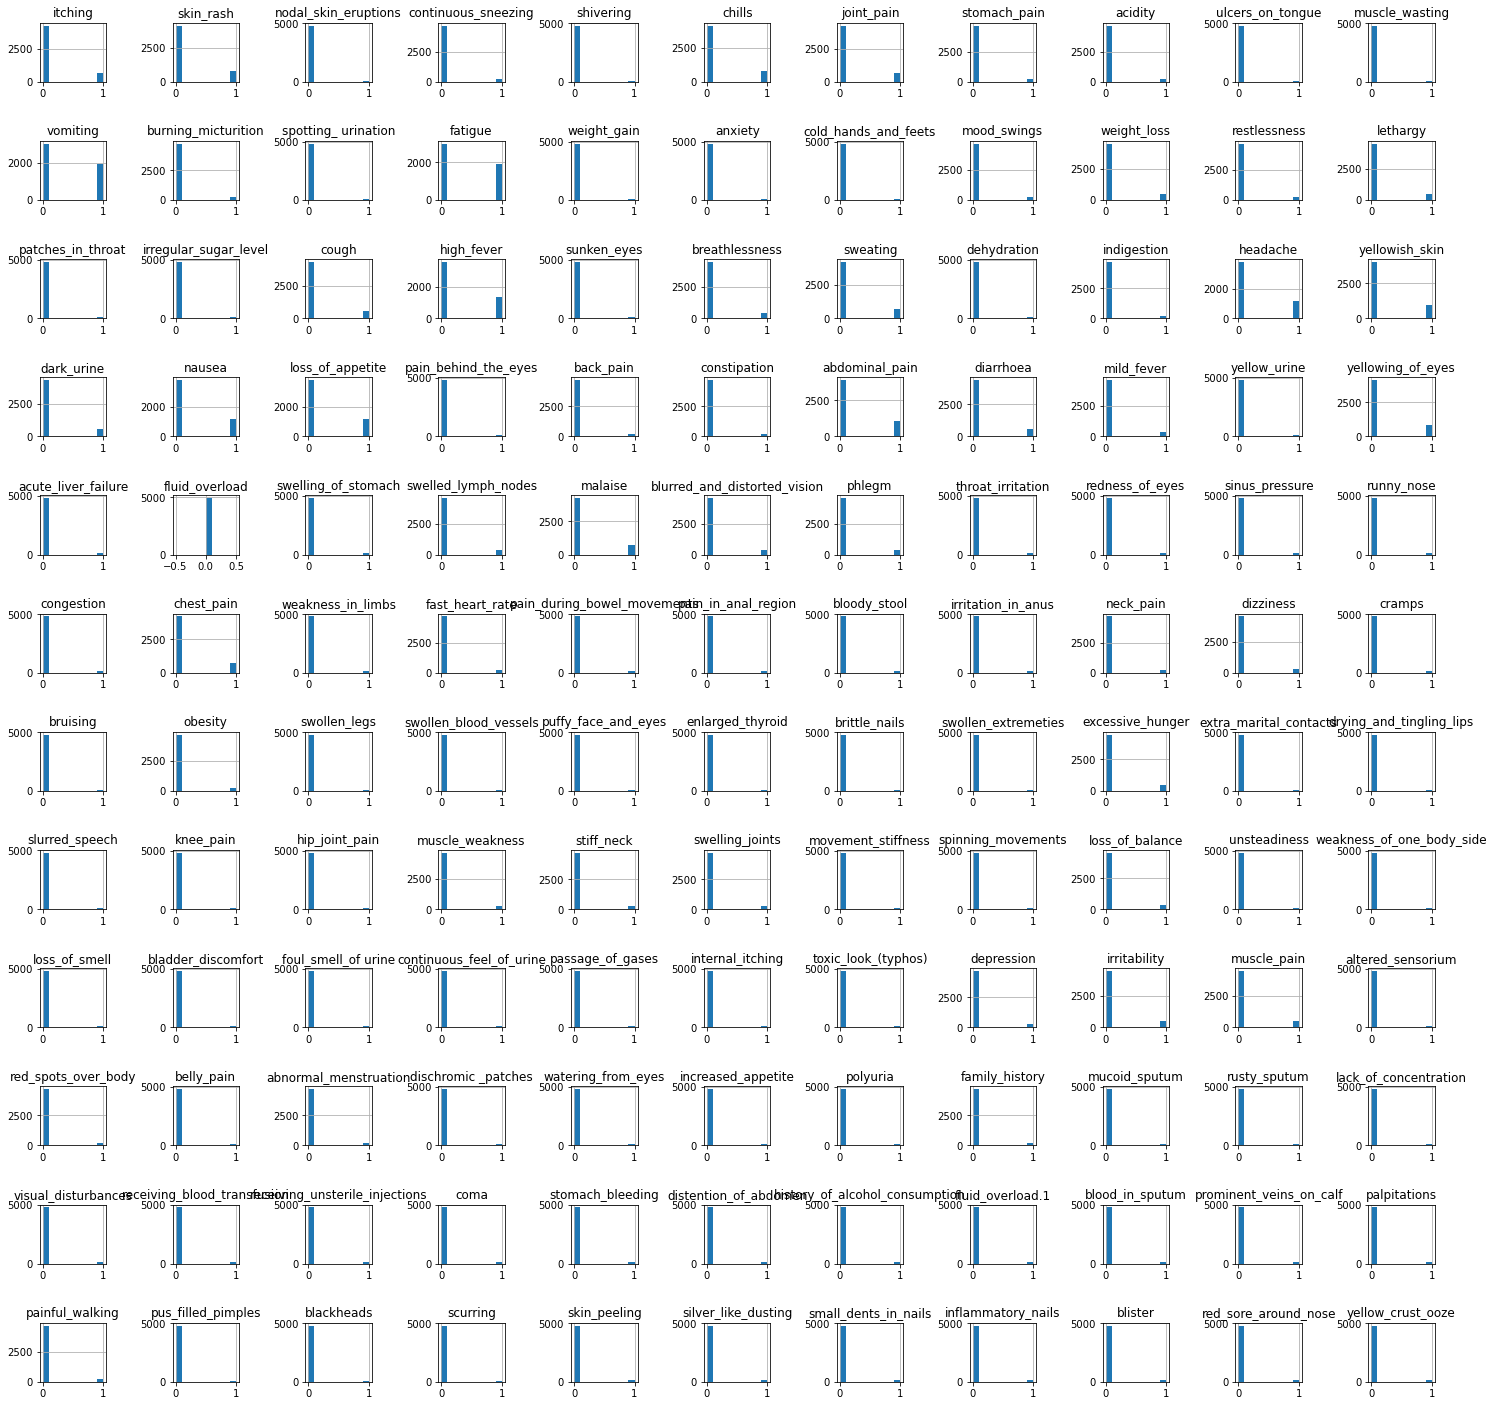

In [13]:
raw_data.hist(figsize=(25,25))
plt.subplots_adjust(hspace=1, wspace=1);

Cool, looks like nearly every symptom column has at least a few positives in the dataset, and there are no non-binary values. The one exception is the "fluid overload" symptom, which contains all 0s.

From a visual look, we can see the the most common symptoms include vomiting, fatigue, and high fever. 
The next tier of common symptoms includes itching, skin rash, nausea, loss of appetite, headache, yellowing of skin, yellowing of eyes, and abdominal pain.

Everything looks clean, tidy and wrangled. Let's rename the DF and save the cleaned data to a new file location.

In [10]:
raw_data.to_csv('data.csv', index=False)